## Gradient Descent from Scratch

### Loss function need not always be a very simple loss function and that can lead to execution get stuck in local minima and hence never achieve global minima

### Normalizing the data can lead to a easier curve and hence reduce complexity of minimizing

In [93]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

In [57]:
X,y = make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1,noise=20)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

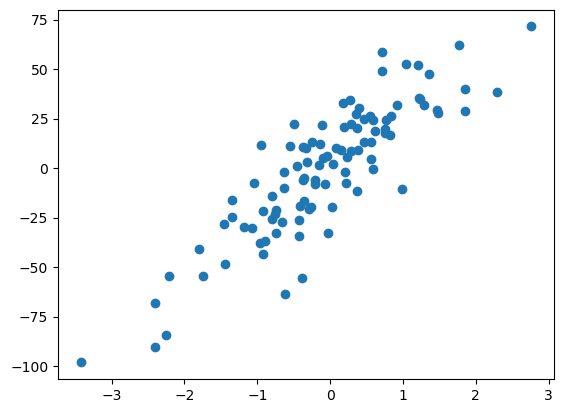

In [10]:
plt.scatter(X,y)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X,y)

LinearRegression()

In [14]:
lr.coef_

array([27.55236663])

In [15]:
lr.intercept_

1.2343635122269183

In [ ]:
# step 1 - assume a m - 27.55

In [95]:
class GDRegressor():
    def __init__(self, learning_rate, epochs):
        self.m = 27.55
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):

        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope, self.b)
        # print(self.b)

    def predict(self, X):
        return self.m * X + self.b

In [96]:
gd = GDRegressor(0.001, 100)

In [97]:
gd.fit(X_train,Y_train)

-36212.35261654332 -83.78764738345669
-24624.399779249463 -59.16324760420723
-16744.59184988963 -42.4186557543176
-11386.32245792495 -31.032333296392647
-7742.699271388967 -23.28963402500368
-5265.035504544498 -18.02459852045918
-3580.2241430902577 -14.444374377368922
-2434.5524173013746 -12.009821960067548
-1655.4956437649353 -10.354326316302613
-1125.7370377601562 -9.228589278542456
-765.5011856769058 -8.46308809286555
-520.5408062602953 -7.942547286605255
-353.96774825700226 -7.588579538348253
-240.69806881476126 -7.347881469533492
-163.67468679403697 -7.184206782739455
-111.29878701994511 -7.07290799571951
-75.68317517356286 -6.997224820545948
-51.46455911802332 -6.945760261427925
-34.99590020025545 -6.9107643612276695
-23.79721213617404 -6.886967149091495
-16.182104252598492 -6.870785044838897
-11.003830891766825 -6.85978121394713
-7.48260500640157 -6.852298608940728
-5.088171404352806 -6.847210437536376
-3.4599565549600584 -6.843750480981416
-2.352770457372401 -6.841397710524043


In [98]:
# for constant b
y_pred = gd.predict(X_test)
print("R2 score: ", r2_score(Y_test, y_pred))

R2 score:  0.5108628676693946


In [28]:
# Gradient Descent can be applied to any logistic or linear regression job

## Considering no known m value

### Now, we will be performing gradient descent in 3D, instead of 2D

In [ ]:
# take random m and b
m = 1
b = 0
epochs = 100


In [81]:
# gradient descent for a 2D dataset - line in 2 dimension - input(cgpa) and output(lpa)
# we have to find n + 1 coefficients, where n is the number of inputs

class GDRegressor_OG():
    def __init__(self, learning_rate, epochs):
        self.m = 28
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slop_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slop_m)
            print(self.b)
            print(self.m)

    def predict(self, X):
        return self.m * X + self.b

In [82]:
gd = GDRegressor_OG(0.001, 100)

In [83]:
gd.fit(X_train, Y_train)

-83.77254233762679
38.86176061513806
-58.77327692302406
48.07404957290258
-41.46454967019359
55.69513038131703
-29.438800082970115
61.88664329653407
-21.053461282900937
66.84839925366556
-15.184880785233382
70.78263145284176
-11.062186585321648
73.87593804669767
-8.154922223012527
76.29156522125975
-6.096897658465209
78.1674978542636
-4.634471958138986
79.61760996910209
-3.5913469042435486
80.73424766328743
-2.8445399486034093
81.59131238284384
-2.307942325727922
82.24733728871367
-1.9210353060198866
82.74830392833384
-1.6411227013946181
83.13009458203591
-1.437966651757001
83.42055836998739
-1.2900706072724608
83.64121234559725
-1.1820946561026715
83.80861858089433
-1.10305172295972
83.93548471332497
-1.0450440423233434
84.03153469806625
-1.002374731887323
84.10419225412916
-0.9709207214258992
84.15911382779468
-0.9476884545626474
84.20060200031833
-0.930497889212595
84.23192474556731
-0.9177569014356614
84.25556106934835
-0.9082996347385405
84.27338941759129
-0.901270253346096
84.286

In [84]:
y_pred = gd.predict(X_test)

In [88]:
r2_score = r2_score(Y_test, y_pred)
print(r2_score)

0.9388550744724383
